In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


In [2]:
df=yf.download(['HDFCBANK.NS'],start='2010-01-01',end='2024-12-31')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df

Ticker,HDFCBANK.NS
Date,
2010-01-04,151.915100
2010-01-05,152.048691
2010-01-06,152.151138
2010-01-07,152.547455
2010-01-08,152.747818
...,...
2024-12-23,1801.000000
2024-12-24,1798.099976
2024-12-26,1790.750000


In [4]:
return_df=df.pct_change()
return_df

Ticker,HDFCBANK.NS
Date,
2010-01-04,NaN
2010-01-05,0.000879
2010-01-06,0.000674
2010-01-07,0.002605
2010-01-08,0.001313
...,...
2024-12-23,0.016653
2024-12-24,-0.001610
2024-12-26,-0.004088


In [5]:
return_df.dropna(inplace=True)
return_df

Ticker,HDFCBANK.NS
Date,
2010-01-05,0.000879
2010-01-06,0.000674
2010-01-07,0.002605
2010-01-08,0.001313
2010-01-11,-0.004023
...,...
2024-12-23,0.016653
2024-12-24,-0.001610
2024-12-26,-0.004088


In [6]:
import matplotlib.pyplot as plt

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x500 with 0 Axes>

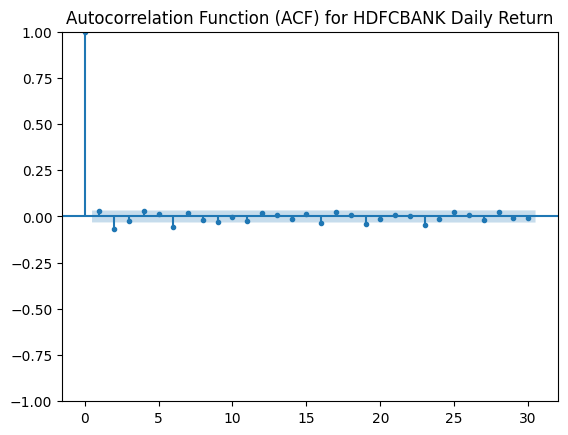

In [8]:
#plot ACF
plt.figure(figsize=(10,5))
plot_acf(return_df,lags=30,markersize=3)
plt.title('Autocorrelation Function (ACF) for HDFCBANK Daily Return')
plt.show()

<Figure size 1000x500 with 0 Axes>

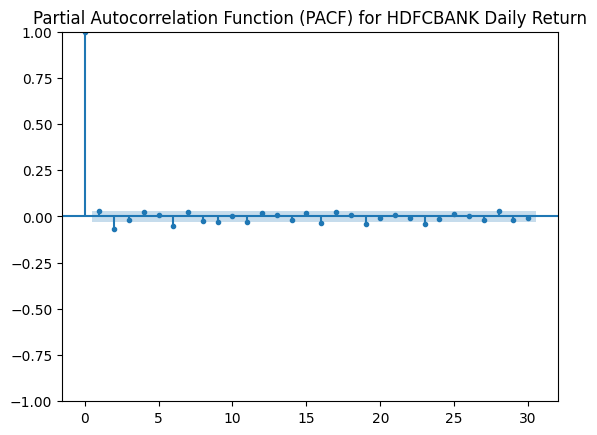

In [9]:
#plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,5))
plot_pacf(return_df,lags=30,markersize=3)
plt.title('Partial Autocorrelation Function (PACF) for HDFCBANK Daily Return')
plt.show()

In [10]:
# AR Model
df['ret']=df.pct_change().fillna(0)*1e4

In [11]:
df['ret']

Date
2010-01-04      0.000000
2010-01-05      8.793774
2010-01-06      6.737809
2010-01-07     26.047556
2010-01-08     13.134481
                 ...    
2024-12-23    166.525543
2024-12-24    -16.102301
2024-12-26    -40.876346
2024-12-27     41.881893
2024-12-30   -113.165442
Name: ret, Length: 3699, dtype: float64

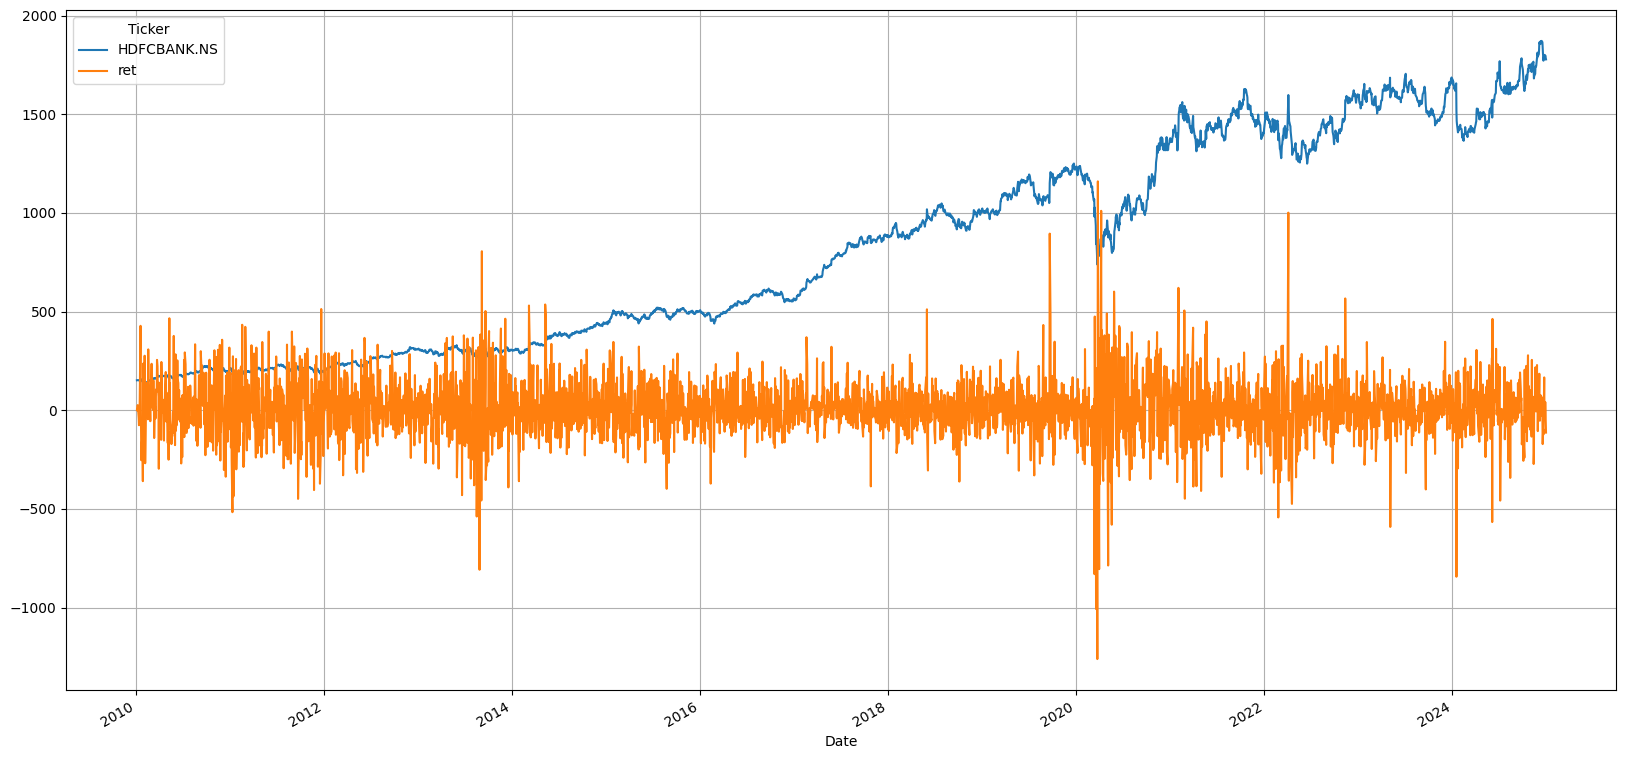

In [12]:
df.plot(figsize=(20,10))
plt.grid()

In [ ]:
#EMA crossover stratergy
# ema1=lookback=20
# ema2=lookback=5

# if ema2>ema1:
    # Long Position
    
# elif ema2<ema1:
    # Short Position

In [13]:
df

Ticker,HDFCBANK.NS,ret
Date,,
2010-01-04,151.915100,0.000000
2010-01-05,152.048691,8.793774
2010-01-06,152.151138,6.737809
2010-01-07,152.547455,26.047556
2010-01-08,152.747818,13.134481
...,...,...
2024-12-23,1801.000000,166.525543
2024-12-24,1798.099976,-16.102301
2024-12-26,1790.750000,-40.876346


In [14]:
df.columns=['Close','Daily_returns']

In [15]:
df['ema1']=df['Close'].ewm(span =20).mean()
df['ema2']=df['Close'].ewm(span =5).mean()
df['ema1']

Date
2010-01-04     151.915100
2010-01-05     151.985235
2010-01-06     152.046154
2010-01-07     152.190872
2010-01-08     152.325592
                 ...     
2024-12-23    1814.722203
2024-12-24    1813.139133
2024-12-26    1811.006835
2024-12-27    1809.791898
2024-12-30    1806.754577
Name: ema1, Length: 3699, dtype: float64

In [16]:
df['Position']=None
df.loc[(df.ema2>df.ema1),'Position']=1
df.loc[(df.ema2<df.ema1),'Position']=-1
df['Position']=df['Position'].ffill()
df['pnl']=df['Position'].shift().mul(df['Daily_returns'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8128\2699423353.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Position']=df['Position'].ffill()


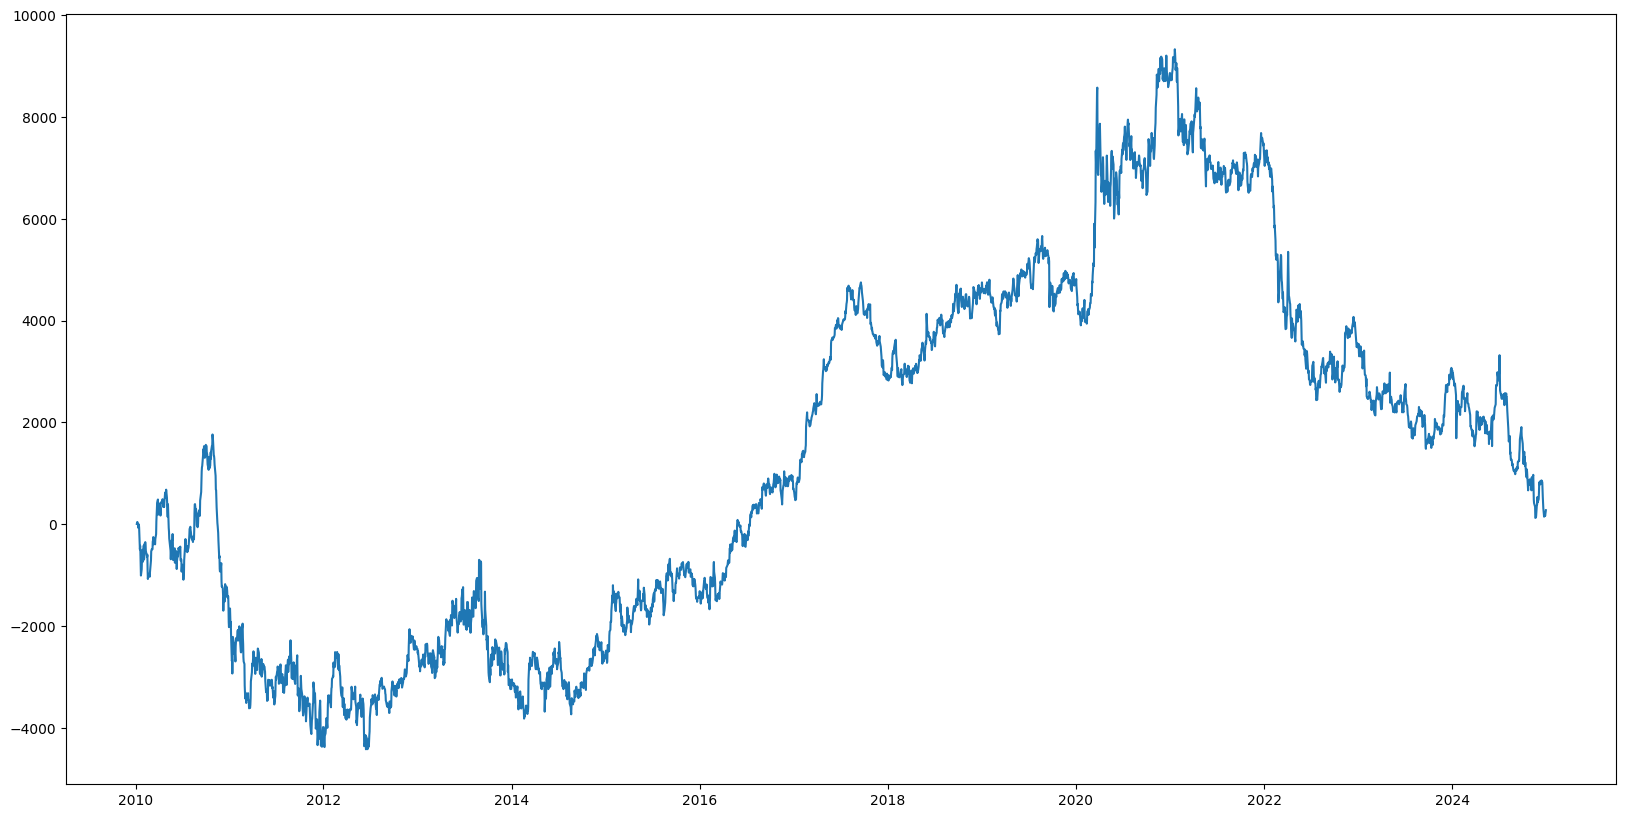

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df['pnl'].cumsum())

In [18]:
df

,Close,Daily_returns,ema1,ema2,Position,pnl
Date,,,,,,
2010-01-04,151.915100,0.000000,151.915100,151.915100,NaN,NaN
2010-01-05,152.048691,8.793774,151.985235,151.995255,1.0,NaN
2010-01-06,152.151138,6.737809,152.046154,152.069094,1.0,6.737809
2010-01-07,152.547455,26.047556,152.190872,152.267798,1.0,26.047556
2010-01-08,152.747818,13.134481,152.325592,152.452071,1.0,13.134481
...,...,...,...,...,...,...
2024-12-23,1801.000000,166.525543,1814.722203,1804.718727,-1.0,-166.525543
2024-12-24,1798.099976,-16.102301,1813.139133,1802.512476,-1.0,16.102301
2024-12-26,1790.750000,-40.876346,1811.006835,1798.591651,-1.0,40.876346
